In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing_raw = pd.read_csv("../Data/housing_data.csv",
                parse_dates=['period_begin', 'period_end'],
                dtype={'total_homes_sold':'Int32', 'region_name':'category'})

In [3]:
housing_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622339 entries, 0 to 622338
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   region_name               622339 non-null  category      
 1   period_begin              622339 non-null  datetime64[ns]
 2   period_end                622339 non-null  datetime64[ns]
 3   total_homes_sold          567839 non-null  Int32         
 4   inventory                 616247 non-null  float64       
 5   active_listings           616905 non-null  float64       
 6   age_of_inventory          616247 non-null  float64       
 7   median_active_list_price  616513 non-null  float64       
 8   months_of_supply          561319 non-null  float64       
dtypes: Int32(1), category(1), datetime64[ns](2), float64(5)
memory usage: 37.5 MB


In [4]:
ca_housing = housing_raw.loc[
    (housing_raw['region_name'].str.contains('CA'))
].assign(region_name= housing_raw['region_name'].str[0:-11])

In [5]:
ca_housing.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 15228 entries, 6 to 622302
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   region_name               15228 non-null  object        
 1   period_begin              15228 non-null  datetime64[ns]
 2   period_end                15228 non-null  datetime64[ns]
 3   total_homes_sold          14841 non-null  Int32         
 4   inventory                 15217 non-null  float64       
 5   active_listings           15218 non-null  float64       
 6   age_of_inventory          15217 non-null  float64       
 7   median_active_list_price  15208 non-null  float64       
 8   months_of_supply          14829 non-null  float64       
dtypes: Int32(1), datetime64[ns](2), float64(5), object(1)
memory usage: 1.9 MB


In [6]:
ca_housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15228 entries, 6 to 622302
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   region_name               15228 non-null  object        
 1   period_begin              15228 non-null  datetime64[ns]
 2   period_end                15228 non-null  datetime64[ns]
 3   total_homes_sold          14841 non-null  Int32         
 4   inventory                 15217 non-null  float64       
 5   active_listings           15218 non-null  float64       
 6   age_of_inventory          15217 non-null  float64       
 7   median_active_list_price  15208 non-null  float64       
 8   months_of_supply          14829 non-null  float64       
dtypes: Int32(1), datetime64[ns](2), float64(5), object(1)
memory usage: 1.1+ MB


In [7]:
ca_housing_pivot = ca_housing.pivot_table(index='period_begin',
                       columns='region_name',
                       values='median_active_list_price').assign(
                       CA_average=lambda x: x.mean(axis=1)
                       )
ca_housing_pivot.head()

region_name,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,El Dorado,Fresno,Glenn,...,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Ventura,Yolo,Yuba,CA_average
period_begin,,,,,,,,,,,,,,,,,,,,,
2017-01-02,730602.5,317541.6,408570.6,291315.3,503458.3,339075.0,603901.2,557404.1,251850.0,237145.8,...,300302.0,257172.9,241695.8,374187.5,225395.8,493908.3,661054.7,447859.2,326833.3,492258.437736
2017-01-09,736230.0,324125.0,408566.4,292348.2,517645.8,340291.6,610701.2,563658.3,253016.6,237145.8,...,301900.0,264609.3,243979.1,368312.5,227729.1,449816.6,662463.1,449942.5,336129.1,493710.639623
2017-01-16,742021.6,330708.3,408483.2,293514.9,524108.3,340291.6,616534.5,565908.3,254187.5,237841.6,...,303858.3,270795.8,246266.6,363729.1,229060.4,412975.0,664828.6,453525.8,345425.0,495369.416981
2017-01-23,748271.7,341458.3,408404.0,294619.1,536408.3,341958.3,621617.8,567158.3,255854.1,238041.6,...,306350.0,274861.4,248141.6,360437.5,229806.2,373483.3,666362.5,456875.8,354720.8,497191.662264
2017-01-30,753938.4,355541.6,407079.0,295527.4,543704.1,344041.6,625516.2,567533.3,258000.0,238125.0,...,308191.6,279764.5,249762.5,360250.0,230139.5,333991.6,668787.5,458300.8,364016.6,499286.207547


## Line Charts

In [8]:
ca_housing_markets = ca_housing_pivot.loc[:, ['San Francisco',
                                              'Los Angeles',
                                              'San Diego',
                                              'CA_average']]
ca_housing_markets.head()

region_name,San Francisco,Los Angeles,San Diego,CA_average
period_begin,,,,
2017-01-02,1229018.7,611561.0,618570.8,492258.437736
2017-01-09,1233393.7,614061.0,621737.5,493710.639623
2017-01-16,1239977.0,617311.0,625820.8,495369.416981
2017-01-23,1247977.0,620644.3,629491.6,497191.662264
2017-01-30,1253310.4,624541.6,632824.0,499286.207547


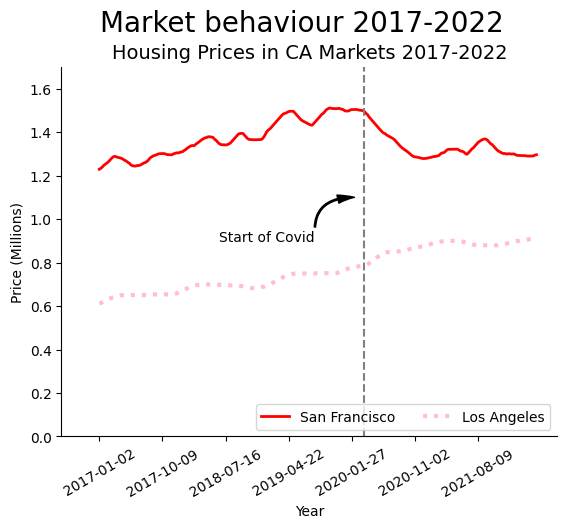

In [9]:
fig, ax = plt.subplots()

ax.plot(ca_housing_markets.index,
        ca_housing_markets['San Francisco']/1000000,
        label='San Francisco', color='Red', 
        linestyle='-', linewidth=2)

ax.plot(ca_housing_markets.index,
        ca_housing_markets['Los Angeles']/1000000,
        label='Los Angeles', color='pink',
        linestyle=':', linewidth=3)

# titles
fig.suptitle('Market behaviour 2017-2022', fontsize=20, y=1.0)
ax.set_title('Housing Prices in CA Markets 2017-2022', fontsize=14)

# labels
ax.set_xlabel('Year', fontsize=10)
ax.set_ylabel('Price (Millions)', fontsize=10)

# axes limits
ax.set_xlim(17000, 19200)
ax.set_ylim(0, 1.700000)

# axis ticks
# ax.set_xticks(['2017-04-19','2020-03-21',"2022-06-30"])
ax.set_xticks(ca_housing_markets.index[::40])
plt.xticks(rotation=30)

# Vertical lines
ax.axvline(18341, c='grey', ls='--')

# text
# ax.text(17800,1.1, "Start of Covid -->")
# fig.text(
#     0.95,
#     0.8,
#     'This chart shows \n the severe drop in \n princes in San Francisco',
#     fontname='figtree',
#     fontsize=16,
#     color='black'
# )

ax.annotate('Start of Covid',
            xy=(18300,1.1),
            xytext=(17700,0.9),
            arrowprops=dict(
                facecolor='black',
                width=1,
                headwidth=6,
                connectionstyle='angle3, angleA=270,angleB=0'
            )
)

# legend
ax.legend(loc='lower right', ncol=3)

# removing chart borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

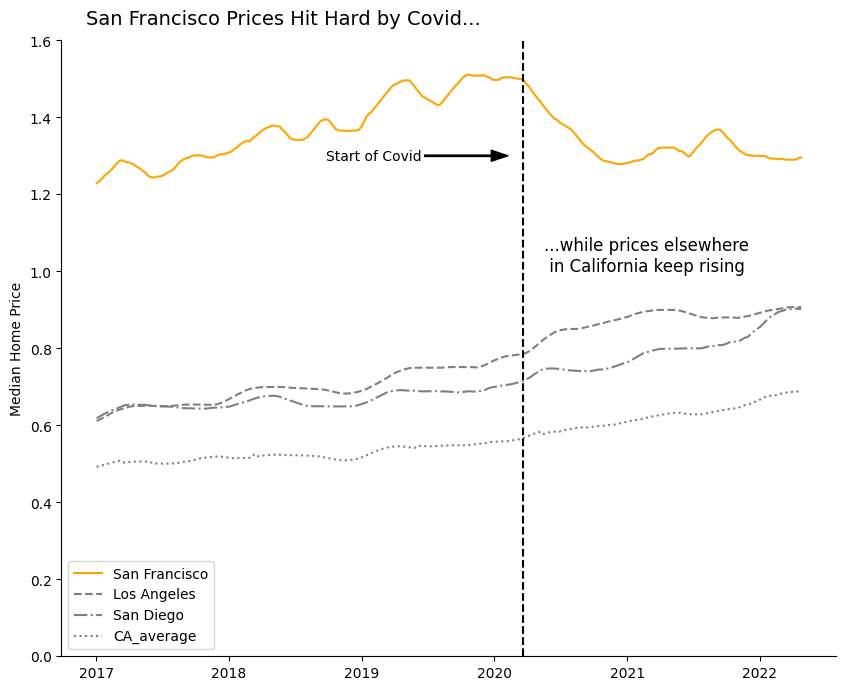

In [10]:
colors=['orange', 'grey', 'grey', 'grey']
ls = ['-', '--', '-.', ':']

fig, ax = plt.subplots(figsize=(10,8))

for i, column in enumerate(ca_housing_markets.columns):
    ax.plot(
        ca_housing_markets[column] / 1000000,
        color=colors[i],
        ls=ls[i]
    )

ax.set_ylabel("Median Home Price")

ax.set_ylim(0, 1.6)
ax.axvline(18341, c='black', ls='--')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(ca_housing_markets.columns, loc='lower left')


ax.annotate(
    "Start of Covid",
    xy=(18300, 1.3),
    xytext=(17800, 1.3),
    arrowprops=dict(facecolor='black',
                    width=1,
                    headwidth=8,
                    connectionstyle='angle3, angleA=270, angleB=0'),
    verticalalignment='center'
)

fig.text(0.15, 0.9, 
         "San Francisco Prices Hit Hard by Covid...",
        fontsize=14
)

ax.text(18400,1,
        "...while prices elsewhere \n in California keep rising",
        fontsize=12)
plt.show()

In [11]:
ca_housing_markets.head()

region_name,San Francisco,Los Angeles,San Diego,CA_average
period_begin,,,,
2017-01-02,1229018.7,611561.0,618570.8,492258.437736
2017-01-09,1233393.7,614061.0,621737.5,493710.639623
2017-01-16,1239977.0,617311.0,625820.8,495369.416981
2017-01-23,1247977.0,620644.3,629491.6,497191.662264
2017-01-30,1253310.4,624541.6,632824.0,499286.207547


## Stacked plots

In [12]:
ca_housing_pivot = (ca_housing.pivot_table(
                       index='period_begin',
                       columns='region_name',
                       values='inventory').assign(
                       CA_average=lambda x: x.mean(axis=1)
                       ).loc[:, ['Los Angeles', 'San Diego',
                                 'San Francisco', 'CA_average']])
ca_housing_pivot.head()

region_name,Los Angeles,San Diego,San Francisco,CA_average
period_begin,,,,
2017-01-02,15492.0,5468.0,626.0,1259.851852
2017-01-09,15605.0,5493.0,652.0,1268.888889
2017-01-16,15724.0,5520.0,673.0,1278.481481
2017-01-23,15834.0,5546.0,685.0,1287.129630
2017-01-30,15972.0,5581.0,697.0,1298.148148


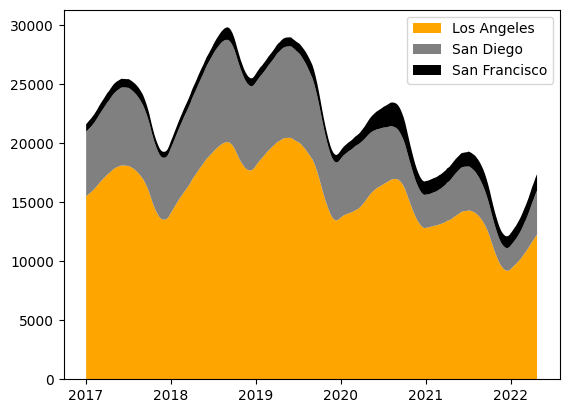

In [13]:
fig, ax = plt.subplots()

labels=ca_housing_pivot.columns
colors=['orange', 'gray', 'black']

ax.stackplot(
    ca_housing_pivot.index,
    ca_housing_pivot['Los Angeles'],
    ca_housing_pivot['San Diego'],
    ca_housing_pivot['San Francisco'],
    labels=labels,
    colors=colors
)

ax.legend();

## Dual Axis Charts

In [14]:
ca_housing = ca_housing.set_index('period_begin').sort_index()

In [15]:
ca_housing.head()

,region_name,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
period_begin,,,,,,,,
2017-01-02,Mono,2017-03-26,97,153.0,161.0,89.7,450745.8,21.208631
2017-01-02,Yolo,2017-03-26,336,234.0,272.0,48.5,447859.2,9.857470
2017-01-02,Stanislaus,2017-03-26,1192,912.0,1043.0,55.3,300302.0,10.971331
2017-01-02,Shasta,2017-03-26,7,17.0,18.0,147.5,489020.8,17.333333
2017-01-02,Lassen,2017-03-26,2,5.0,5.0,98.8,198750.0,5.500000


In [16]:
sd_dual = (
    ca_housing
    .loc[ca_housing['region_name']=='San Diego',
         ['inventory', 'median_active_list_price']]
)

sd_dual.head()

,inventory,median_active_list_price
period_begin,,
2017-01-02,5468.0,618570.8
2017-01-09,5493.0,621737.5
2017-01-16,5520.0,625820.8
2017-01-23,5546.0,629491.6
2017-01-30,5581.0,632824.0


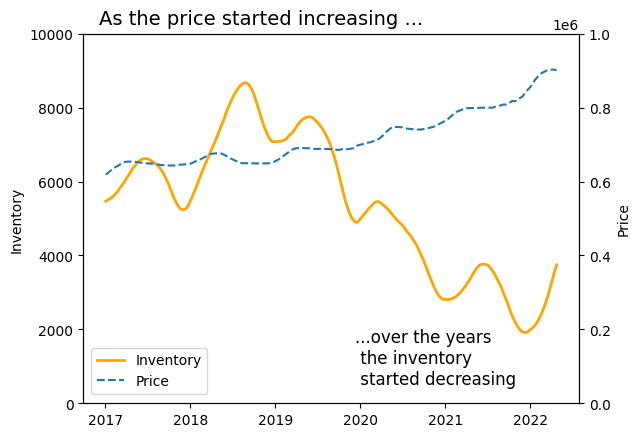

In [17]:
fig, ax = plt.subplots()

# first axis
ax.plot(sd_dual['inventory'], 
        label='Inventory',
        color='orange',
        lw='2')


# second axis
ax2 = ax.twinx()
ax2.plot(sd_dual['median_active_list_price'], 
         label='Price', ls='--')

# x and y labels
ax.set_ylabel('Inventory')
ax2.set_ylabel('Price')

# x and y limits
ax.set_ylim(0, 10000)
ax2.set_ylim(0, 1000000)

# text
fig.text(0.15, 0.9, 
         "As the price started increasing ...",
        fontsize=14
)

fig.text(0.55,0.15,
        "...over the years \n the inventory \n started decreasing",
        fontsize=12)



fig.legend(bbox_to_anchor=(0.33,0.24))
plt.show()

## Bar Charts

In [18]:
ca_housing.head()

,region_name,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
period_begin,,,,,,,,
2017-01-02,Mono,2017-03-26,97,153.0,161.0,89.7,450745.8,21.208631
2017-01-02,Yolo,2017-03-26,336,234.0,272.0,48.5,447859.2,9.857470
2017-01-02,Stanislaus,2017-03-26,1192,912.0,1043.0,55.3,300302.0,10.971331
2017-01-02,Shasta,2017-03-26,7,17.0,18.0,147.5,489020.8,17.333333
2017-01-02,Lassen,2017-03-26,2,5.0,5.0,98.8,198750.0,5.500000


In [19]:
total_sold = (
    ca_housing
    .groupby('region_name')
    .agg({'total_homes_sold':'sum'})
    .sort_values('total_homes_sold', ascending=False)
).iloc[:10]

In [20]:
total_sold

,total_homes_sold
region_name,
Los Angeles,4622703
San Diego,2373289
Riverside,2335243
Orange,2004799
San Bernardino,1705727
Sacramento,1256838
Santa Clara,967707
Alameda,925469
Contra Costa,921039


<BarContainer object of 10 artists>

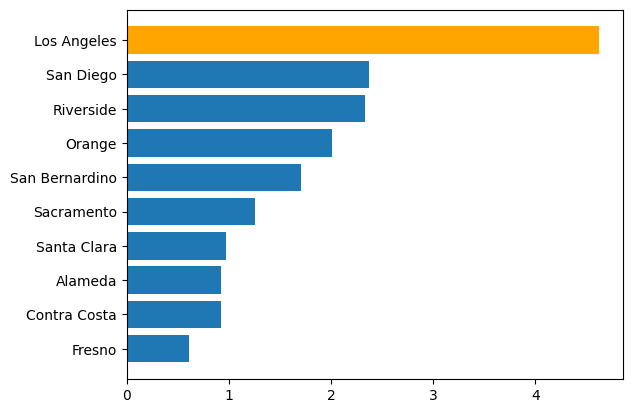

In [21]:
fig, ax = plt.subplots()

colors=  ['#1f77b4']*9 + ['orange']

ax.barh(y=total_sold.index[::-1],
       width=(total_sold['total_homes_sold'][::-1])/1000000, 
       color=colors)

# ax.xaxis.set_tick_params(rotation=90)

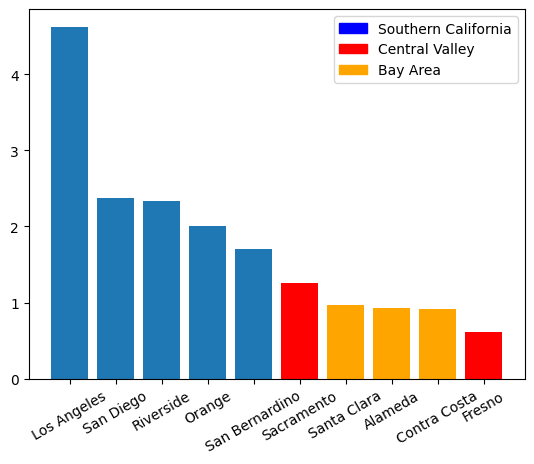

In [22]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots()

colors=  ['#1f77b4']*5 + ['red'] + ['orange']*3 + ['red']

ax.bar(x=total_sold.index,
       height=total_sold['total_homes_sold']/1000000, 
       color=colors)

socal = mpatches.Patch(color='blue',label='Southern California')
central = mpatches.Patch(color='red', label='Central Valley')
bay = mpatches.Patch(color='orange', label='Bay Area')


plt.legend(handles=[socal, central, bay], loc='best')
ax.xaxis.set_tick_params(rotation=30)

## Stacked Bar Charts

In [23]:
ca_or = housing_raw.loc[housing_raw['region_name'].str[-2:].isin(['CA','OR','WA'])]

ca_or.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
6,"Sacramento County, CA",2020-06-22,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794
19,"Garfield County, WA",2019-06-17,2019-09-08,7,9.0,10.0,52.7,152666.6,9.333333
26,"Gilliam County, OR",2018-06-18,2018-09-09,3,9.0,9.0,95.6,143037.5,9.000000
99,"Klickitat County, WA",2017-04-17,2017-07-09,48,53.0,58.0,87.2,326237.5,16.193434
124,"Jefferson County, WA",2017-02-06,2017-04-30,138,177.0,190.0,127.8,404637.5,22.486617


In [24]:
ca_or = ca_or.assign(
        price_range = pd.cut(
            ca_or.loc[:,'median_active_list_price'],
            [0, 400000, 600000, 2000000],
            labels=['0-400k','400k-600k', '600k+']),
        state=ca_or['region_name'].str[-2:]
    )

In [28]:
ca_or = ca_or.query("period_end == '2021-08-01'").pivot_table(
    index='price_range',
    columns='state',
    values='inventory',
    aggfunc='sum'
)

In [29]:
ca_or

state,CA,OR,WA
price_range,,,
0-400k,4267.0,1074.0,2143.0
400k-600k,13877.0,4711.0,4858.0
600k+,35147.0,1229.0,3649.0


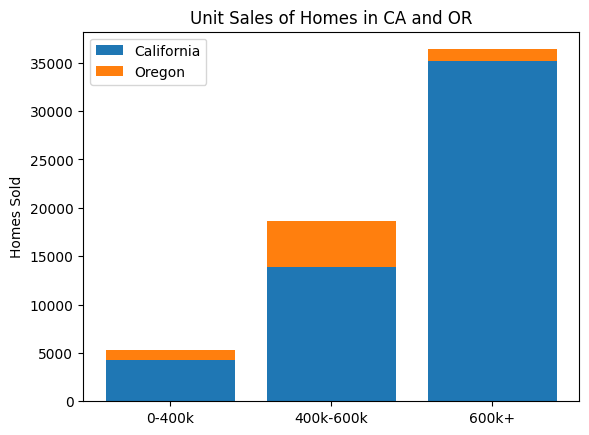

In [30]:
fig, ax = plt.subplots()

ax.bar(
    ca_or.index,
    ca_or['CA'],
    label='California'
)

ax.bar(
    ca_or.index,
    ca_or['OR'],
    label='Oregon',
    bottom=ca_or['CA']
)

# ax.bar(
#     ca_or.index,
#     ca_or['WA'],
#     label='Washington',
#     bottom=ca_or['CA'] + ca_or['OR']
# )

ax.set_title('Unit Sales of Homes in CA and OR')
ax.set_ylabel('Homes Sold')

ax.legend()
plt.show()

In [31]:
ca_or.head()

state,CA,OR,WA
price_range,,,
0-400k,4267.0,1074.0,2143.0
400k-600k,13877.0,4711.0,4858.0
600k+,35147.0,1229.0,3649.0


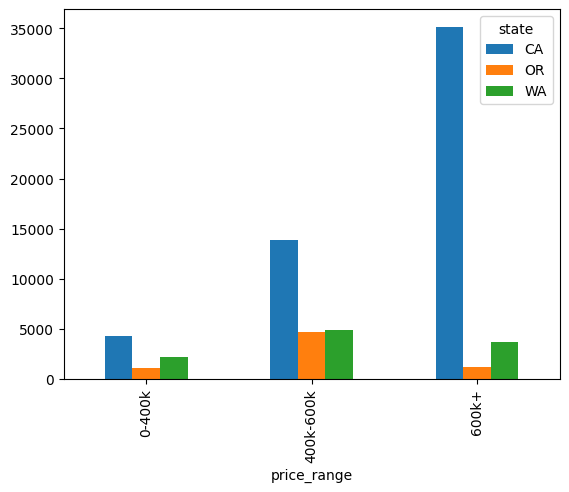

In [32]:
ca_or.plot.bar();

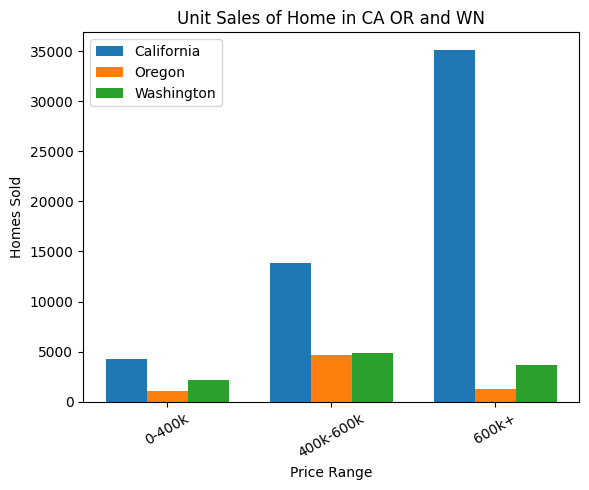

In [33]:
fig, ax = plt.subplots()

width = 0.25

x1 = np.arange(len(ca_or))
x2 = [x + width for x in x1]
x3 = [x + width for x in x2]

ax.bar(
    x1, 
    ca_or['CA'],
    label='California',
    width=width
)

ax.bar(
    x2,
    ca_or['OR'],
    label='Oregon',
    width=width
)

ax.bar(
    x3,
    ca_or['WA'],
    label='Washington',
    width=width
)

ax.set_title('Unit Sales of Home in CA OR and WN')
ax.set_ylabel("Homes Sold")

ax.set_xlabel('Price Range')
ax.set_xticks(x2)
ax.set_xticklabels(ca_or.index)

plt.xticks(
    x2,
    ca_or.index,
    rotation=30
)

ax.legend()
plt.show()

## Combo Charts

In [34]:
sd_dual = (ca_housing
.loc[ca_housing['region_name'] == 'San Diego',
     ['inventory','median_active_list_price']]
).sort_index()

In [35]:
sd_dual.head()

,inventory,median_active_list_price
period_begin,,
2017-01-02,5468.0,618570.8
2017-01-09,5493.0,621737.5
2017-01-16,5520.0,625820.8
2017-01-23,5546.0,629491.6
2017-01-30,5581.0,632824.0


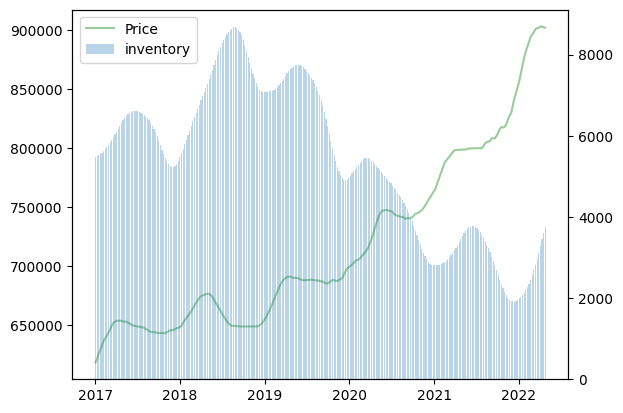

In [36]:
fig, ax = plt.subplots()

width = 5

ax.plot(
    sd_dual['median_active_list_price'],
    color='green',
    label='Price',
    alpha=0.4
)
# ax.legend()

ax2 = ax.twinx()

ax2.bar(sd_dual.index,
        sd_dual['inventory'],
        width=width,
        alpha=0.3,
        label='inventory')

# ax2.legend()

fig.legend(bbox_to_anchor=[0.33,0.88])
plt.show()

In [37]:
sd_dual2 = sd_dual.resample('Y').mean()
sd_dual2

,inventory,median_active_list_price
period_begin,,
2017-12-31,5986.730769,645314.217308
2018-12-31,7438.433962,658434.637736
2019-12-31,6794.538462,685614.486538
2020-12-31,4494.076923,735517.426923
2021-12-31,2975.961538,803811.036538
2022-12-31,2692.470588,889710.241176


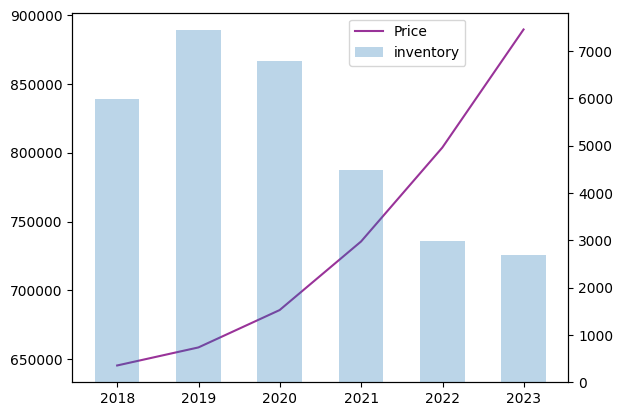

In [38]:
fig, ax = plt.subplots()

width = 200

ax.plot(
    sd_dual2['median_active_list_price'],
    color='purple',
    label='Price',
    alpha=0.8
)
# ax.legend()

ax2 = ax.twinx()

ax2.bar(sd_dual2.index,
        sd_dual2['inventory'],
        width=width,
        alpha=0.3,
        label='inventory')

# ax2.legend()

fig.legend(bbox_to_anchor=[0.75,0.88])
plt.show()

## Pie Charts

In [45]:
sales_totals = (ca_housing.query(
    "region_name in ['San Francisco', 'Los Angeles', 'San Diego']")
    .groupby(['region_name'])
    .agg({'total_homes_sold':'sum'})
)

sales_totals

,total_homes_sold
region_name,
Los Angeles,4622703
San Diego,2373289
San Francisco,371776


In [50]:
sales_totals.iloc[:, 0][::-1]

region_name
San Francisco     371776
San Diego        2373289
Los Angeles      4622703
Name: total_homes_sold, dtype: Int32

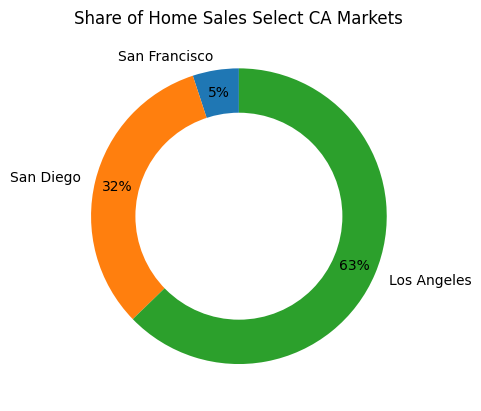

In [134]:
fig, ax = plt.subplots()

labels=['San Francisco', 'San Diego', 'Los Angeles',]
ax.pie(x=sales_totals.iloc[:,0][::-1],
       startangle=90,
       labels=labels,
       autopct='%.0f%%',
       pctdistance=0.85,
      )

hole = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()


# Adding Circle in Pie Chart
fig.gca().add_artist(hole)


ax.set_title('Share of Home Sales Select CA Markets')
plt.show()

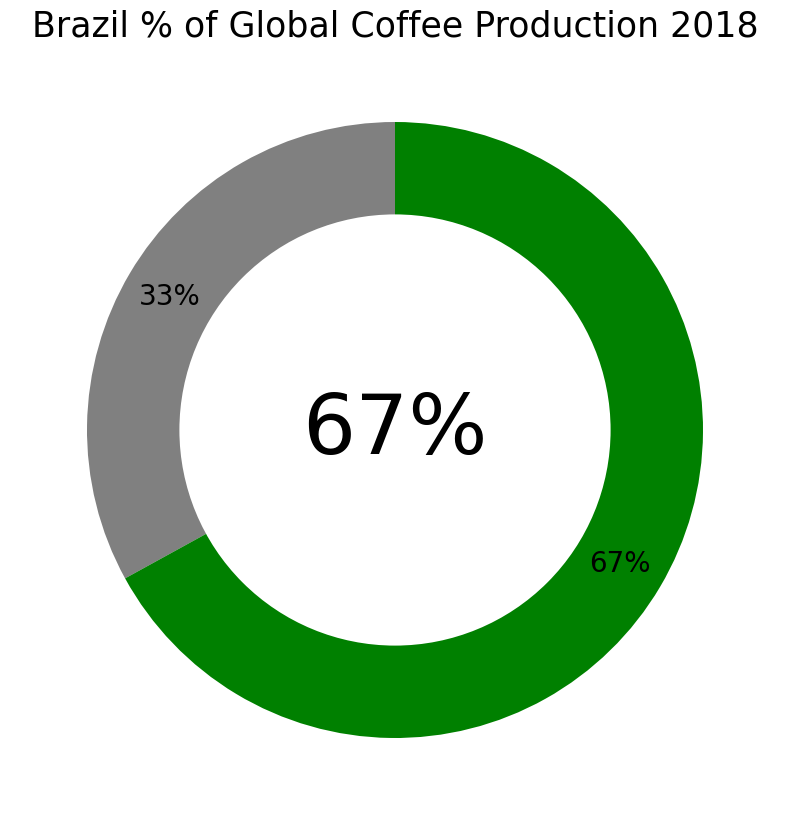

In [135]:
fig, ax = plt.subplots(figsize=(10,10))

ax.pie(
    [0.33,0.67],
    startangle=90,
    labels=["",""],
    autopct='%0.0f%%',
    pctdistance=0.85,
    colors=['grey','green'],
    textprops={'fontsize': 20, 'color':'black'}
)

hole = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()


# Adding Circle in Pie Chart
fig.gca().add_artist(hole)

plt.text(
    0,
    0,
    "67%",
    fontsize=60,
    ha='center',
    va='center'
)

ax.set_title("Brazil % of Global Coffee Production 2018",
             fontsize=25)

plt.show()

## Histograms

In [138]:
diamonds = (
    pd.read_csv("../data/Diamonds Prices2022.csv")
    .drop(['Unnamed: 0'],axis=1)
)

diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


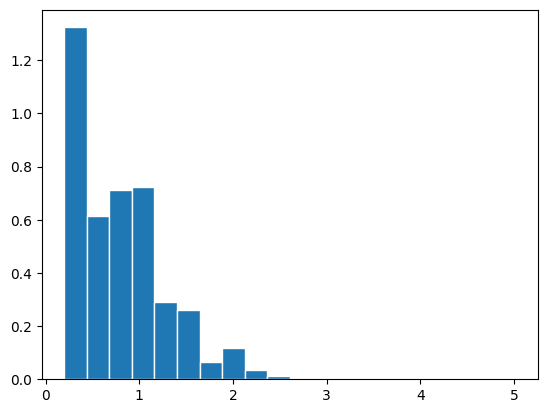

In [152]:
fig, ax = plt.subplots()

ax.hist(
    diamonds['carat'],
    bins=20,
    density=True,
    edgecolor='white',
    linewidth=1
)

plt.show()

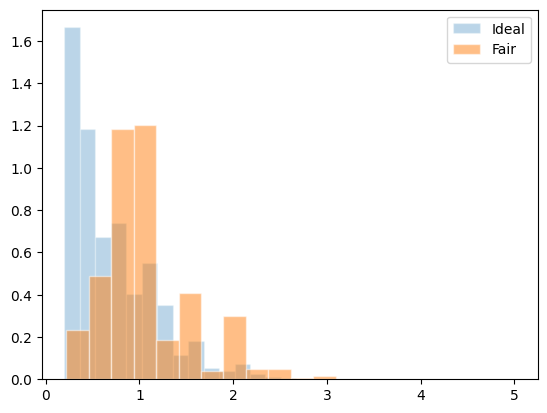

In [167]:
fig, ax = plt.subplots()

ax.hist(
    diamonds.query("cut == 'Ideal'")['carat'] ,
    bins=20,
    density=True,
    edgecolor='white',
    linewidth=1,
    alpha=0.3
)

ax.hist(
    diamonds.query("cut == 'Fair'")['carat'] ,
    bins=20,
    density=True,
    edgecolor='white',
    linewidth=1,
    alpha=0.5
)

ax.legend(['Ideal','Fair'])
plt.show()

In [157]:
diamonds.query("cut == 'Ideal'")['carat']

0        0.23
11       0.23
13       0.31
16       0.30
39       0.33
         ... 
53925    0.79
53926    0.71
53929    0.71
53935    0.72
53939    0.75
Name: carat, Length: 21551, dtype: float64